In [1]:
import numpy as np
import pandas as pd
import warnings
# warnings.filterwarnings('ignore') 


In [2]:
dataset_path = './data/csv/washed_data_train.csv' #原来的训练集的路径
df = pd.read_csv(dataset_path) # 获取训练集，转为DataFrame
df = df.dropna(subset=['lambda_onset']) # 以防万一，去掉 lambda_onset 为空的数据
df = df.reset_index(drop=True) # 去掉数据后重置index
original_df = df
print('\nImported original data from '+ dataset_path+', shape: '+str(np.shape(df))) # 输出log


Imported original data from ./data/csv/washed_data_train.csv, shape: (292, 46)


In [3]:
round_names= ['no_hid','hid_Asym','hid_Non_fixed','hid_non-co_is_1','hid_non-cov_is_0','hid_SeP_is_Pv'] # ,'XGBoost'
round_keys = [None,'Asym.?','Non_fixed?','non-co','non-cov','Se/P']
round_values = [None,1,1,1,0,'Pv']

In [4]:
print('generating partially hidden files...') # 输出log

def rm_from_df(dataframe,condition_key,condition_value):
    i=0
    for index,row in dataframe.iterrows():
        try:
            if row[condition_key] == condition_value:
                dataframe = dataframe.drop([index])
                i +=1
        except:
            pass
    print('removed '+ str(i)+' molecules, shape: '+str(np.shape(dataframe)))
    return dataframe

for round_name,round_key,round_value in zip(round_names,round_keys,round_values):
    df = original_df
    print('\ngenerating...' + round_name)
    if round_name == 'no hid':
        df.to_csv('./data/xlsx/hid_trainset_'+round_name+'.csv')
        print()
    else:
        df = rm_from_df(df,round_key,round_value)
        df.to_csv('./data/xlsx/hid_trainset_'+round_name+'.csv')

generating partially hidden files...

generating...no_hid
removed 0 molecules, shape: (292, 46)

generating...hid_Asym
removed 25 molecules, shape: (267, 46)

generating...hid_Non_fixed
removed 56 molecules, shape: (236, 46)

generating...hid_non-co_is_1
removed 39 molecules, shape: (253, 46)

generating...hid_non-cov_is_0
removed 0 molecules, shape: (292, 46)

generating...hid_SeP_is_Pv
removed 6 molecules, shape: (286, 46)



Starting...

Imported data from ./data/xlsx/hid_trainset_no_hid.csv, shape: (246, 47)
graph saved to./output/final_output_no_hid.jpg
no_hiddone!

Starting...

Imported data from ./data/xlsx/hid_trainset_hid_Asym.csv, shape: (223, 47)
graph saved to./output/final_output_hid_Asym.jpg
hid_Asymdone!

Starting...

Imported data from ./data/xlsx/hid_trainset_hid_Non_fixed.csv, shape: (190, 47)
graph saved to./output/final_output_hid_Non_fixed.jpg
hid_Non_fixeddone!

Starting...

Imported data from ./data/xlsx/hid_trainset_hid_non-co_is_1.csv, shape: (219, 47)
graph saved to./output/final_output_hid_non-co_is_1.jpg
hid_non-co_is_1done!

Starting...

Imported data from ./data/xlsx/hid_trainset_hid_non-cov_is_0.csv, shape: (246, 47)
graph saved to./output/final_output_hid_non-cov_is_0.jpg
hid_non-cov_is_0done!

Starting...

Imported data from ./data/xlsx/hid_trainset_hid_SeP_is_Pv.csv, shape: (240, 47)
graph saved to./output/final_output_hid_SeP_is_Pv.jpg
hid_SeP_is_Pvdone!


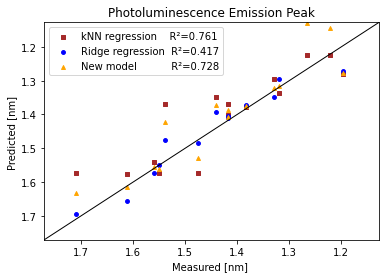

In [5]:
from EnsembleModel import get_final_output
results = pd.DataFrame(np.zeros((15,1)))
for round_name in round_names:
    print('\nStarting...' )
    result = get_final_output('./data/xlsx/hid_trainset_'+round_name+'.csv', round_name)
    results = pd.concat((results,result),axis=1)
    print(round_name+'done!')

15 graphs

In [6]:
del results[results.keys()[0]]

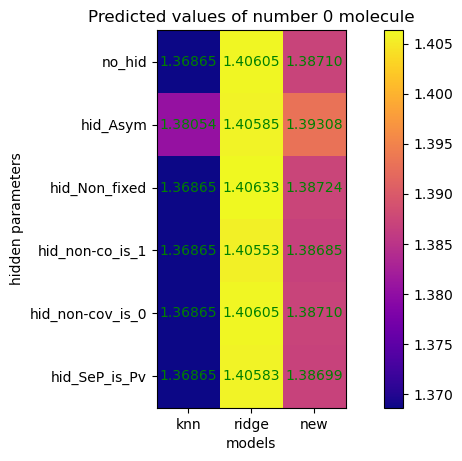

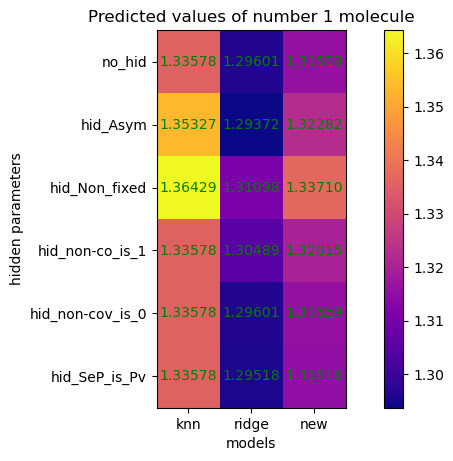

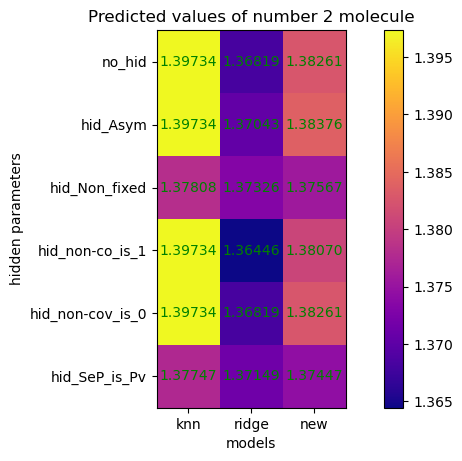

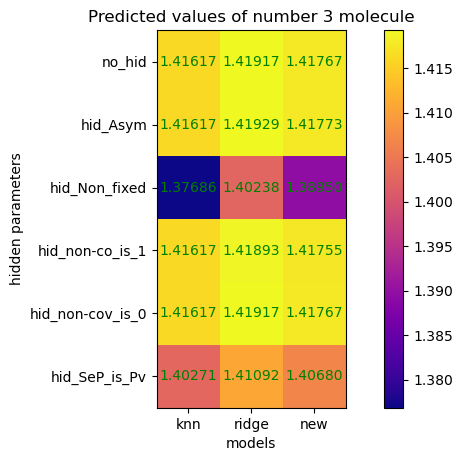

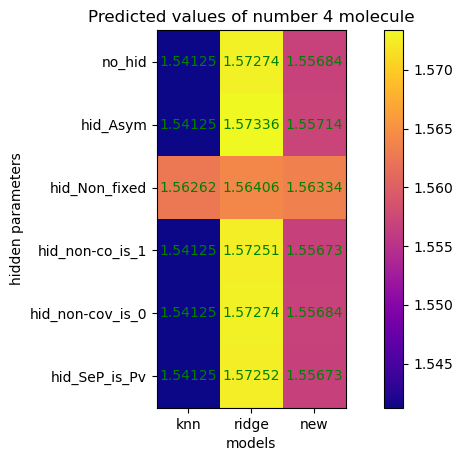

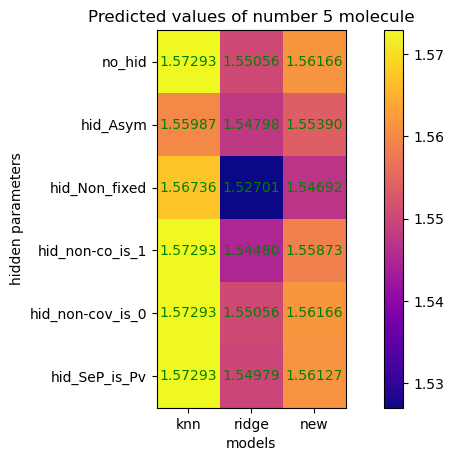

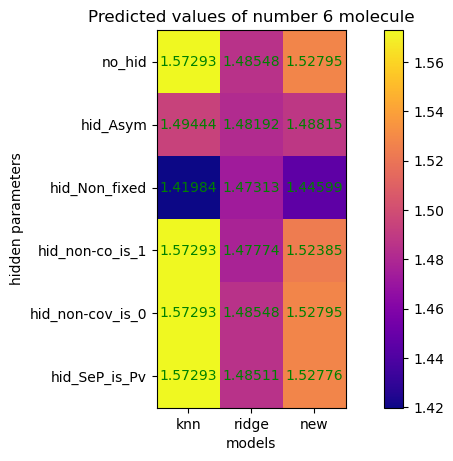

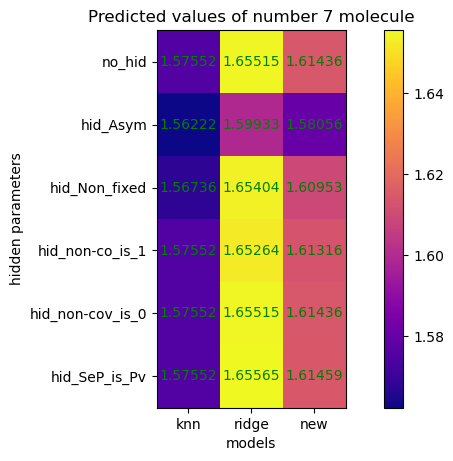

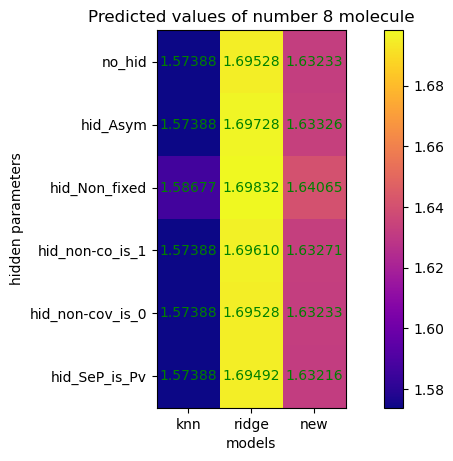

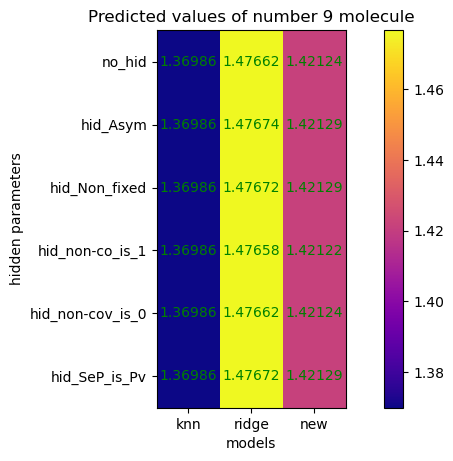

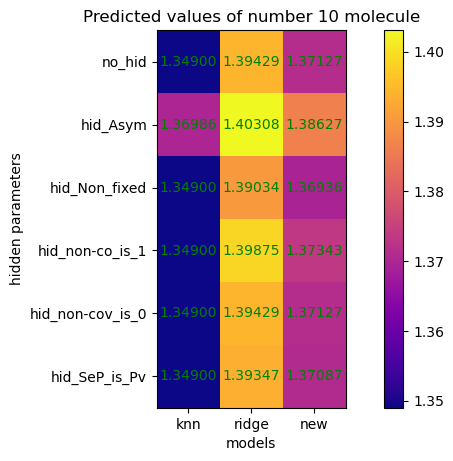

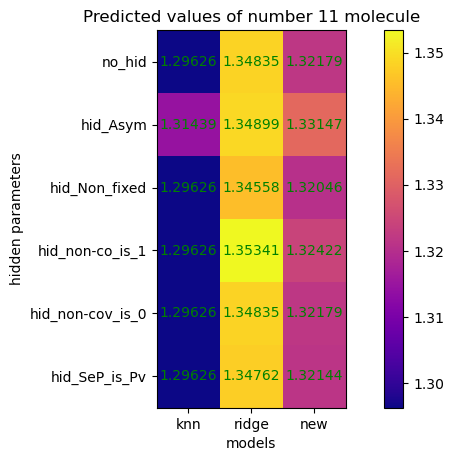

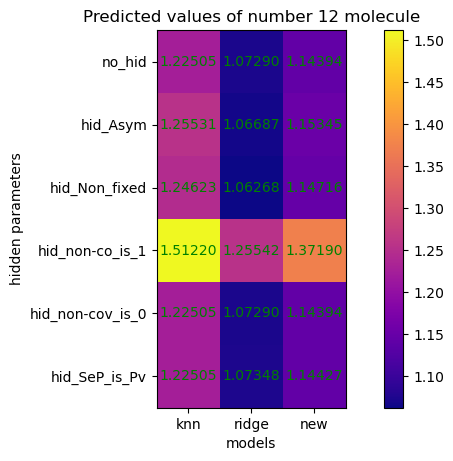

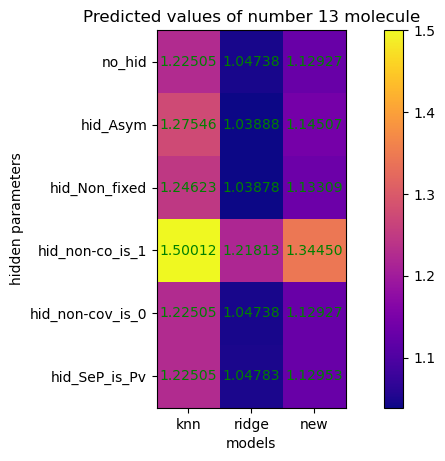

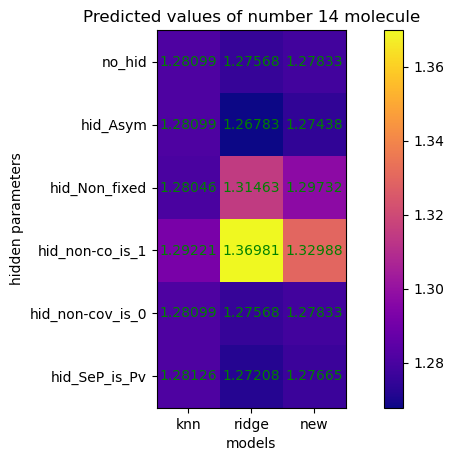

In [11]:
for index,row in results.iterrows():
    graph = pd.DataFrame(round_names)
    i=0
    cell_row = []
    molecule_result = []
    for cell in row:
        cell_row.append(cell)
        i += 1
        if i >= 3:
            i = 0
            molecule_result.append(cell_row)
            cell_row = []
    graph = pd.concat([graph,pd.DataFrame(molecule_result,columns = ['knn','ridge','new'])],axis=1)
    del graph[graph.keys()[0]]
    import matplotlib.pyplot as plt
    from matplotlib.pyplot import MultipleLocator
    plt.rcParams['savefig.dpi'] = 200 #图片像素
    plt.rcParams['figure.dpi'] = 100 #分辨率
    plt.figure(figsize=(10,5)) #设置画布的尺寸
    graph_mat = graph.values
    plt.title('Predicted values of number '+str(index)+' molecule')
    ax=plt.gca()
    plt.colorbar(plt.imshow(graph_mat,cmap='plasma'))
    # ax.set_yticks(np.arange(0, 5, 1))
    ax.xaxis.set_major_locator(MultipleLocator(1))
    ax.set_yticklabels(['index','no_hid','hid_Asym','hid_Non_fixed','hid_non-co_is_1','hid_non-cov_is_0','hid_SeP_is_Pv'])
    ax.set_xticklabels(['index','knn','ridge','new'])
    plt.xlabel("models")
    plt.ylabel("hidden parameters")
    for (x, y), value in np.ndenumerate(graph_mat.T):
        plt.text(x, y, f"{value:.5f}",color = 'g', va="center", ha="center")
    plt.savefig('./output/molecule_heatmap_'+str(index)+'.jpg')
    plt.show
